In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as npy
import pylab as py

from scipy.io import netcdf
import scipy.signal as si

from matplotlib.colors import LogNorm
from mpl_toolkits.basemap import Basemap


%matplotlib inline

In [2]:
import sys
sys.path.append('/home/albert/python')
print(sys.path)

['', '/home/albert/anaconda2/lib/python2.7/site-packages/oocgcm-0.1.0-py2.7.egg', '/home/albert/anaconda2/lib/python2.7/site-packages/numpy-1.11.1-py2.7-linux-x86_64.egg', '/home/albert/anaconda2/lib/python27.zip', '/home/albert/anaconda2/lib/python2.7', '/home/albert/anaconda2/lib/python2.7/plat-linux2', '/home/albert/anaconda2/lib/python2.7/lib-tk', '/home/albert/anaconda2/lib/python2.7/lib-old', '/home/albert/anaconda2/lib/python2.7/lib-dynload', '/home/albert/anaconda2/lib/python2.7/site-packages/Sphinx-1.4.1-py2.7.egg', '/home/albert/anaconda2/lib/python2.7/site-packages/setuptools-23.0.0-py2.7.egg', '/home/albert/anaconda2/lib/python2.7/site-packages', '/home/albert/anaconda2/lib/python2.7/site-packages/IPython/extensions', '/home/albert/.ipython', '/home/albert/python']


In [3]:
import PyRaf_colormaps as raf
import matplotlib as mpl

In [4]:
fdir = "/home/albert/Data/precips/ALL_NWD/"
mdir = "/home/albert/Data/precips/MASK/"

nwdfile1 = fdir + 'intens_GPCP_mensuel-NCEPR1_interp_mask.nc'
nwdfile2 = fdir + 'intens_TRMM_mensuel-NCEPR1_interp_mask.nc'
nwdfile3 = fdir + 'intens_mensuel_NCEP-R1_mask.nc'
nwdfile4 = fdir + 'intens_mensuel_NCEP-R2_mask.nc'
nwdfile5 = fdir + 'intens_MERRA_mensuel-NCEPR1_interp_mask.nc'
nwdfile6 = fdir + 'intens_CFSR_mensuel-NCEPR1_interp_mask.nc'
nwdfile7 = fdir + 'intens_ERAinterim_mensuel-NCEPR1_interp_mask.nc'
mfile = mdir + 'mask_intens_mensuel.nc'

In [5]:
fnwd1 = netcdf.netcdf_file(nwdfile1,'r')
fnwd2 = netcdf.netcdf_file(nwdfile2,'r')
fnwd3 = netcdf.netcdf_file(nwdfile3,'r')
fnwd4 = netcdf.netcdf_file(nwdfile4,'r')
fnwd5 = netcdf.netcdf_file(nwdfile5,'r')
fnwd6 = netcdf.netcdf_file(nwdfile6,'r')
fnwd7 = netcdf.netcdf_file(nwdfile7,'r')
fm =  netcdf.netcdf_file(mfile,'r')

In [6]:
nwd1 = fnwd1.variables['intens']
nwd2 = fnwd2.variables['intens']
nwd3 = fnwd3.variables['intens']
nwd4 = fnwd4.variables['intens']
nwd5 = fnwd5.variables['intens']
nwd6 = fnwd6.variables['intens']
nwd7 = fnwd7.variables['intens']
mask = fm.variables['intens_percent90']

lat1 = fnwd1.variables['lat']
lon1 = fnwd1.variables['lon']


In [7]:
lat1a=lat1[:]
lon1a=lon1[:]

nwd1a=nwd1[:]
nwd2a=nwd2[:]
nwd3a=nwd3[:]
nwd4a=nwd4[:]
nwd5a=nwd5[:]
nwd6a=nwd6[:]
nwd7a=nwd7[:]
maska=mask[:]


In [8]:
mask=npy.equal(nwd1a,0.)
nwd1a_ma=npy.ma.array(nwd1a,mask=mask)
nwd2a_ma=npy.ma.array(nwd2a,mask=mask)
nwd3a_ma=npy.ma.array(nwd3a,mask=mask)
nwd4a_ma=npy.ma.array(nwd4a,mask=mask)
nwd5a_ma=npy.ma.array(nwd5a,mask=mask)
nwd6a_ma=npy.ma.array(nwd6a,mask=mask)
nwd7a_ma=npy.ma.array(nwd7a,mask=mask)




In [9]:
maskb=npy.equal(maska,0.)
nwd1a_ma=npy.ma.array(nwd1a,mask=maskb)
nwd2a_ma=npy.ma.array(nwd2a,mask=maskb)
nwd3a_ma=npy.ma.array(nwd3a,mask=maskb)
nwd4a_ma=npy.ma.array(nwd4a,mask=maskb)
nwd5a_ma=npy.ma.array(nwd5a,mask=maskb)
nwd6a_ma=npy.ma.array(nwd6a,mask=maskb)
nwd7a_ma=npy.ma.array(nwd7a,mask=maskb)




In [10]:
lon2D1, lat2D1 = npy.meshgrid(lon1a, lat1a)



In [11]:
nwd1a_ma.shape

(156, 94, 192)

In [12]:
nwd1ts=npy.mean(npy.mean(nwd1a_ma,1),1)
nwd2ts=npy.mean(npy.mean(nwd2a_ma,1),1)
nwd3ts=npy.mean(npy.mean(nwd3a_ma,1),1)
nwd4ts=npy.mean(npy.mean(nwd4a_ma,1),1)
nwd5ts=npy.mean(npy.mean(nwd5a_ma,1),1)
nwd6ts=npy.mean(npy.mean(nwd6a_ma,1),1)
nwd7ts=npy.mean(npy.mean(nwd7a_ma,1),1)

In [13]:
npy.savetxt("/home/albert/Data/precips/ASCII/monthly_global_mean_Intensity_GPCP-on-NCEP.txt",nwd1ts.data[:], fmt='%10.5f', delimiter=',')
npy.savetxt("/home/albert/Data/precips/ASCII/monthly_global_mean_Intensity_TRMM-on-NCEP.txt",nwd2ts.data[:], fmt='%10.5f', delimiter=',')
npy.savetxt("/home/albert/Data/precips/ASCII/monthly_global_mean_Intensity_NCEP-R1.txt",nwd3ts.data[:], fmt='%10.5f', delimiter=',')
npy.savetxt("/home/albert/Data/precips/ASCII/monthly_global_mean_Intensity_NCEP-R2.txt",nwd4ts.data[:], fmt='%10.5f', delimiter=',')
npy.savetxt("/home/albert/Data/precips/ASCII/monthly_global_mean_Intensity_MERRA-on-NCEP.txt",nwd5ts.data[:], fmt='%10.5f', delimiter=',')
npy.savetxt("/home/albert/Data/precips/ASCII/monthly_global_mean_Intensity_CFSR-on-NCEP.txt",nwd6ts.data[:], fmt='%10.5f', delimiter=',')
npy.savetxt("/home/albert/Data/precips/ASCII/monthly_global_mean_Intensity_ERAinterim-on-NCEP.txt",nwd7ts.data[:], fmt='%10.5f', delimiter=',')

In [44]:
mean.shape

(156,)

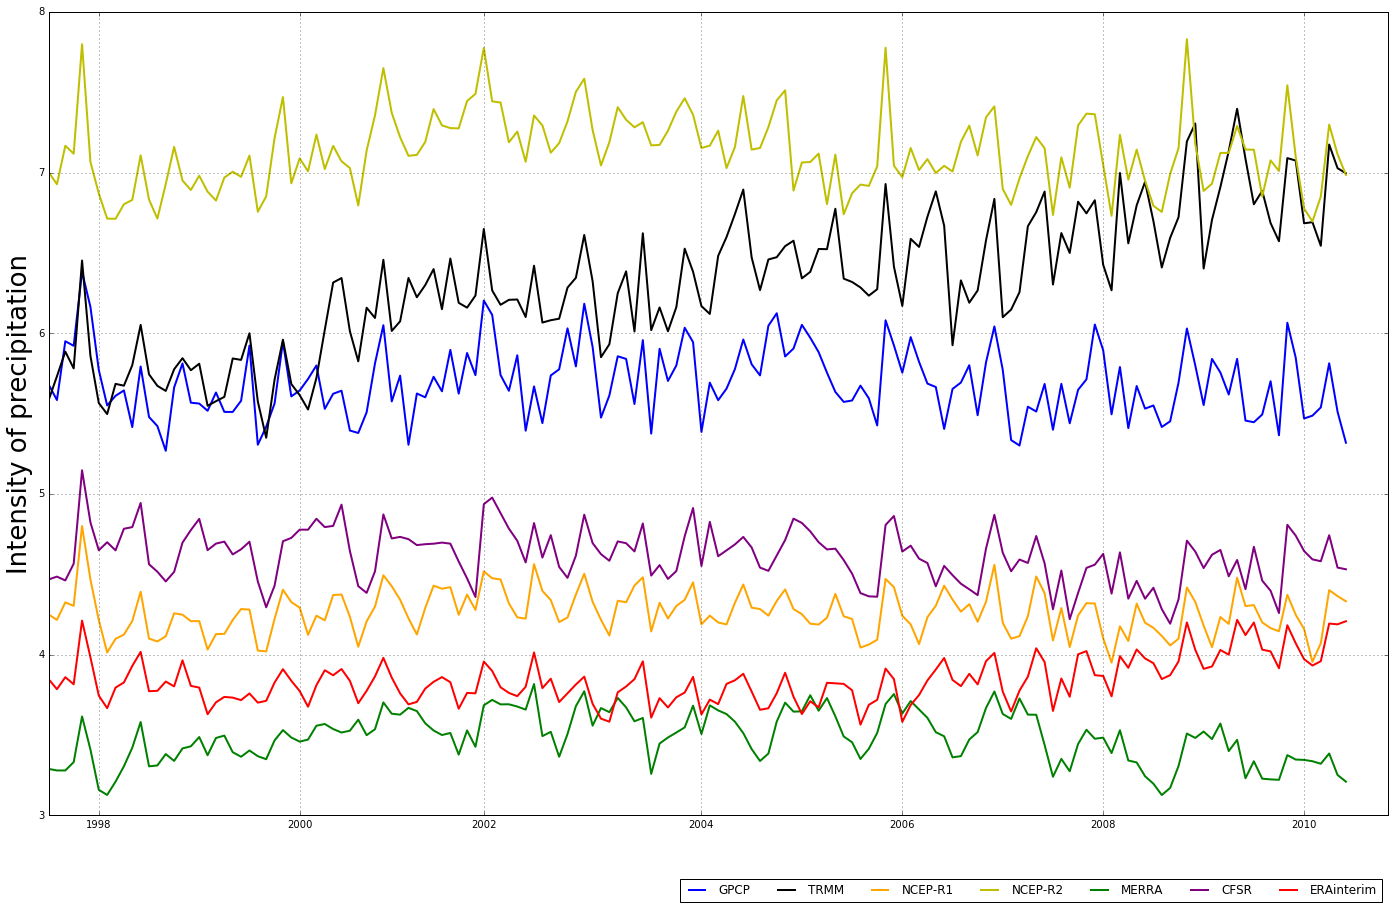

In [12]:
t=[]
for i in npy.arange(1998,2011):
    for j in npy.arange(1,13):
        t.append(mdates.date2num(mdates.datetime.date(i,j,15)))
date=mdates.num2date(t)
fig_size = [24., 16.]
figure = plt.figure(figsize=fig_size)
ax=figure.add_subplot(1,1,1)
ax.plot(nwd1ts,'blue',linewidth=2,label="GPCP")
ax.plot(nwd2ts,'black',linewidth=2,label="TRMM")
ax.plot(nwd3ts,'orange',linewidth=2,label="NCEP-R1")
ax.plot(nwd4ts,'y',linewidth=2,label="NCEP-R2")
ax.plot(nwd5ts,'g',linewidth=2,label="MERRA")
ax.plot(nwd6ts,'purple',linewidth=2,label="CFSR")
ax.plot(nwd7ts,'r',linewidth=2,label="ERAinterim")
plt.grid()
plt.ylabel('Intensity of precipitation',fontsize=26)
newlocsx   = npy.array([6,30,52,78,102,126,150],'f')
newlabelsx = npy.array([1998,2000,2002,2004,2006,2008,2010],'i')
plt.xticks(newlocsx,newlabelsx)
bbox = ax.get_position()
ax.set_position([bbox.x0, bbox.y0 + bbox.height * 0.1,bbox.width, bbox.height * 0.9])
ax.legend(('GPCP','TRMM','NCEP-R1','NCEP-R2','MERRA','CFSR','ERAinterim'),bbox_to_anchor=(1., -0.072),ncol=7)
plt.savefig('/home/albert/Data/precips/PLOTS/time_serie_moyenne_globale_mensuelle_intensity.png')

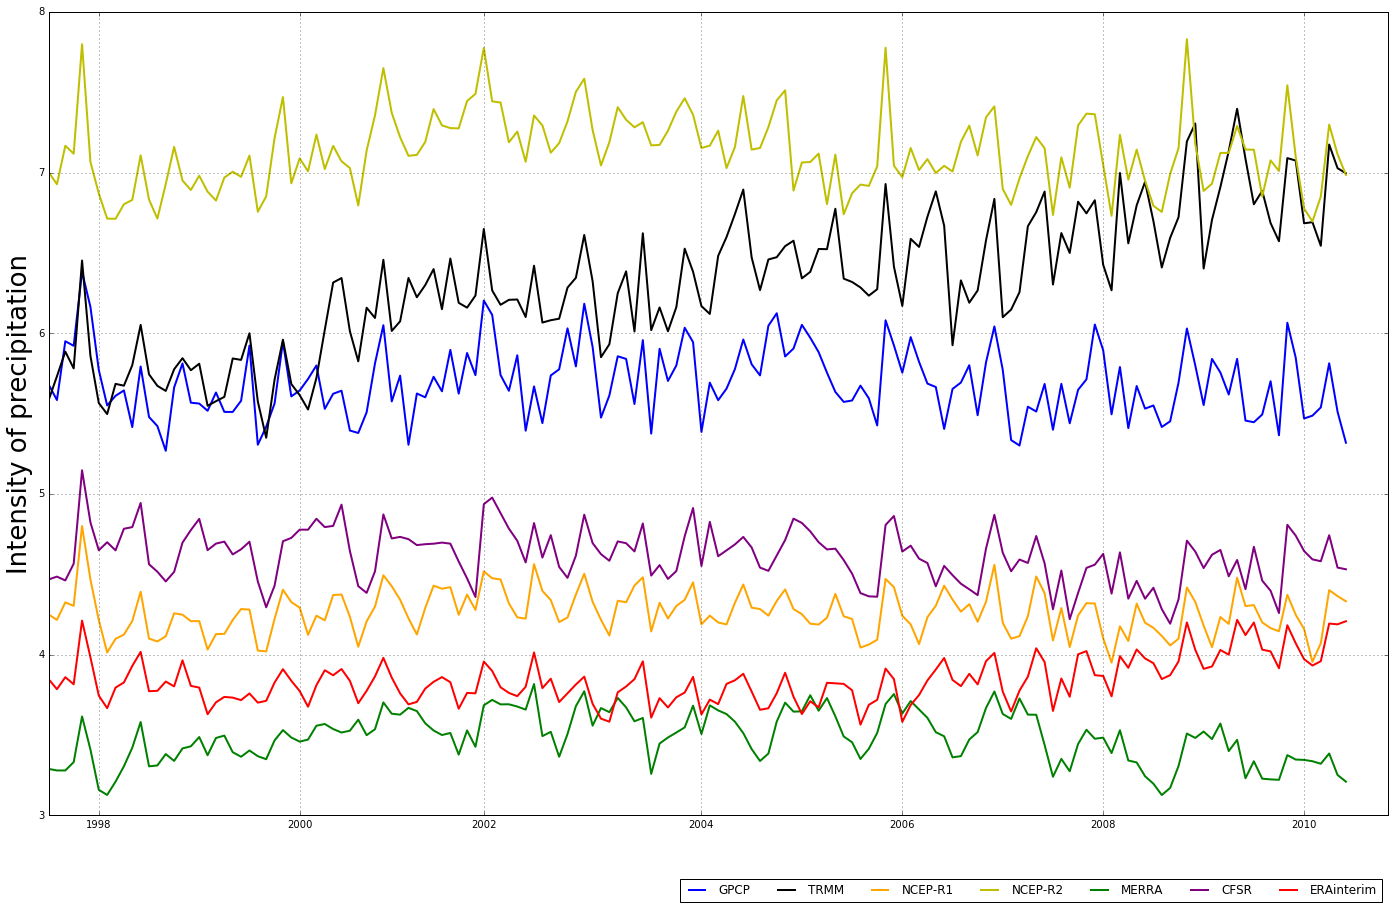

In [12]:
t=[]
for i in npy.arange(1998,2011):
    for j in npy.arange(1,13):
        t.append(mdates.date2num(mdates.datetime.date(i,j,15)))
date=mdates.num2date(t)
fig_size = [24., 16.]
figure = plt.figure(figsize=fig_size)
ax=figure.add_subplot(1,1,1)
ax.plot(nwd1ts,'blue',linewidth=2,label="GPCP")
ax.plot(nwd2ts,'black',linewidth=2,label="TRMM")
ax.plot(nwd3ts,'orange',linewidth=2,label="NCEP-R1")
ax.plot(nwd4ts,'y',linewidth=2,label="NCEP-R2")
ax.plot(nwd5ts,'g',linewidth=2,label="MERRA")
ax.plot(nwd6ts,'purple',linewidth=2,label="CFSR")
ax.plot(nwd7ts,'r',linewidth=2,label="ERAinterim")
plt.grid()
plt.ylabel('Intensity of precipitation',fontsize=26)
newlocsx   = npy.array([6,30,52,78,102,126,150],'f')
newlabelsx = npy.array([1998,2000,2002,2004,2006,2008,2010],'i')
plt.xticks(newlocsx,newlabelsx)
bbox = ax.get_position()
ax.set_position([bbox.x0, bbox.y0 + bbox.height * 0.1,bbox.width, bbox.height * 0.9])
ax.legend(('GPCP','TRMM','NCEP-R1','NCEP-R2','MERRA','CFSR','ERAinterim'),bbox_to_anchor=(1., -0.072),ncol=7)
plt.savefig('/home/albert/Data/precips/PLOTS/time_serie_moyenne_globale_mensuelle_intensity.png')